In [10]:
import math
padding = 0
kernel_size = 1
stride = 1
H_out = math.floor((55 + 2*padding - kernel_size)/float(stride)) + 1
W_out = math.floor((55 + 2*padding - kernel_size)/float(stride)) + 1
print(H_out)
print(W_out)
print(H_out*W_out)

55
55
3025


In [4]:
H_out*W_out

3969

In [8]:
96*96*2

18432

In [9]:
2*256*256

131072

In [7]:
k = 1
padding = 0
kernel_size = 1
stride = 1
H_out = math.floor((55 + 2*padding - kernel_size)/float(stride)) + 1
W_out = math.floor((55 + 2*padding - kernel_size)/float(stride)) + 1
print(H_out)
print(W_out)
print(H_out*W_out)


55
55
3025


In [ ]:
# number of params = 1*in_channel*out_channel
# initially 11*11*3*96
#then 1*1*96*96
#and 1*1*96*96 params for first convolution

###
# 1*1*256*256

In [43]:
import pandas as pd
from PIL import Image
img = Image.open('16698.jpg')
df = pd.read_csv('train.txt', sep='  ')

/var/folders/9p/4f_fcqf57lx9ck4gqb88rkm80000gn/T/ipykernel_54485/3815728751.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('train.txt', sep='  ')


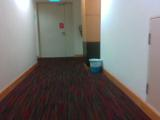

In [30]:
img

In [31]:
df

,frame,intention_type,current_velocity,steering_wheel_angle,dlm
0,716928,dlm,0.700000,0.230323,forward
1,138397,dlm,0.700000,0.360842,left
2,35065,dlm,0.700000,-0.700000,left
3,431722,dlm,0.700000,-0.000000,forward
4,442489,dlm,0.700000,-0.440205,forward
...,...,...,...,...,...
96995,180106,dlm,0.433006,0.700000,right
96996,419358,dlm,-0.000000,-0.000000,forward
96997,158119,dlm,0.700000,-0.267016,forward
96998,194361,dlm,0.700000,-0.000000,left


In [33]:
changed_df= df.copy()
changed_df['frame'] = changed_df['frame'].astype(str)+'_flipped'
changed_df['steering_wheel_angle'] = changed_df['steering_wheel_angle']*-1
changed_df['dlm'] = df['dlm'].apply(lambda x: flip(x))

In [59]:
changed_df

,frame,intention_type,current_velocity,steering_wheel_angle,dlm
0,716928_flipped,dlm,0.700000,-0.230323,forward
1,138397_flipped,dlm,0.700000,-0.360842,right
2,35065_flipped,dlm,0.700000,0.700000,right
3,431722_flipped,dlm,0.700000,0.000000,forward
4,442489_flipped,dlm,0.700000,0.440205,forward
...,...,...,...,...,...
96995,180106_flipped,dlm,0.433006,-0.700000,left
96996,419358_flipped,dlm,-0.000000,0.000000,forward
96997,158119_flipped,dlm,0.700000,0.267016,forward
96998,194361_flipped,dlm,0.700000,0.000000,right


In [35]:
df_merged = pd.concat([df, changed_df], ignore_index=True)

In [61]:

changed_df.to_csv(os.path.join('.', 'train.txt'), header=None, index=None, sep=' ', mode='a')

In [62]:

out = img.transpose(Image.FLIP_LEFT_RIGHT)

/var/folders/9p/4f_fcqf57lx9ck4gqb88rkm80000gn/T/ipykernel_54485/1032858824.py:1: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  out = img.transpose(Image.FLIP_LEFT_RIGHT)


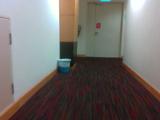

In [45]:
out.save('transpose-output.png')

In [55]:
def augment_data(path):
    df = pd.read_csv(os.path.join(path, 'train.txt'), sep='  ')
    changed_df= df.copy()
    changed_df['frame'] = changed_df['frame'].astype(str)+'_flipped'
    changed_df['steering_wheel_angle'] = changed_df['steering_wheel_angle']*-1
    changed_df['dlm'] = df['dlm'].apply(lambda x: flip(x))
    df['frame'].apply(lambda x: save_flipped_copy(path, x))
    

In [56]:
import os

def flip(s):
    if s == 'left':
        s = 'right'
    elif s== 'right':
        s = 'left'
    return s

def save_flipped_copy(path, frame):
    im = Image.open(os.path.join(path, f'{frame}.jpg'))
    out = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    out.save(os.path.join(path, 'images', f'{frame}_flipped.jpg'))

In [53]:
save_flipped_copy('.', 16698)

In [57]:
augment_data('.')

/var/folders/9p/4f_fcqf57lx9ck4gqb88rkm80000gn/T/ipykernel_54485/3876929699.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(os.path.join(path, 'train.txt'), sep='  ')


FileNotFoundError: [Errno 2] No such file or directory: './716928.jpg'

In [7]:
df = pd.read_csv(os.path.join('.', 'train.txt'), delim_whitespace=True)

In [3]:
import pandas as pd
from PIL import Image
import os

In [8]:
df

,frame,intention_type,current_velocity,steering_wheel_angle,dlm
0,716928,dlm,0.700000,0.230323,forward
1,138397,dlm,0.700000,0.360842,left
2,35065,dlm,0.700000,-0.700000,left
3,431722,dlm,0.700000,-0.000000,forward
4,442489,dlm,0.700000,-0.440205,forward
...,...,...,...,...,...
193995,180106_flipped,dlm,0.433006,-0.700000,left
193996,419358_flipped,dlm,-0.000000,0.000000,forward
193997,158119_flipped,dlm,0.700000,0.267016,forward
193998,194361_flipped,dlm,0.700000,0.000000,right
